# Mattermost cluster viz

In [ ]:
!pip install mpld3

In [ ]:
!pip install swifter

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import mpld3
from nltk.corpus import stopwords
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sklearn as sk
import sklearn.decomposition

In [10]:
%matplotlib inline 
import swifter
import gensim
import re
np.random.seed(123)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from matplotlib import style
style.use('ggplot')
from nltk.stem.snowball import SnowballStemmer

In [4]:
import es_core_news_md
import textacy
import spacy

In [5]:
def fetch_dataset(csv_file_name):
    data = pd.read_csv(csv_file_name, sep=',')

    return data

In [6]:
data = fetch_dataset('mattermost_running.csv')
mess = str(data['text'])
text = mess.strip()
print(type(text))

<class 'str'>


In [7]:
def tokenize(text):
    text = text.replace('\n', '. ').lower()

    sentences = [sent for sent in nltk.sent_tokenize(text, language='english')]
    filtered_sentences = []
    for sent in sentences:
        tokens = [word for word in nltk.word_tokenize(sent, language='english')]
        filtered_tokens = []
        for token in tokens:
            if re.match(r'^[a-z]*$', token):
                filtered_tokens.append(token)
        if len(filtered_tokens) > 2:
            filtered_sentences.append(filtered_tokens)
    return filtered_sentences

def tokenize_words(text):
    text = text.replace('\n', '. ').lower()
    
    tokens = [word for sent in nltk.sent_tokenize(text, language='english') for word in nltk.word_tokenize(sent, language='english')]
    filtered_tokens = []
    for token in tokens:
        if re.match(r'^[a-z]*$', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [11]:
X = data.text.swifter.apply(lambda x: tokenize(x))
X = [x for lista in X for x in lista]

Pandas Apply: 100%|██████████| 287/287 [00:00<00:00, 3215.37it/s]


In [12]:
model = gensim.models.Word2Vec(X)

In [13]:
model.wv.save_word2vec_format('model.txt', binary=False)

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


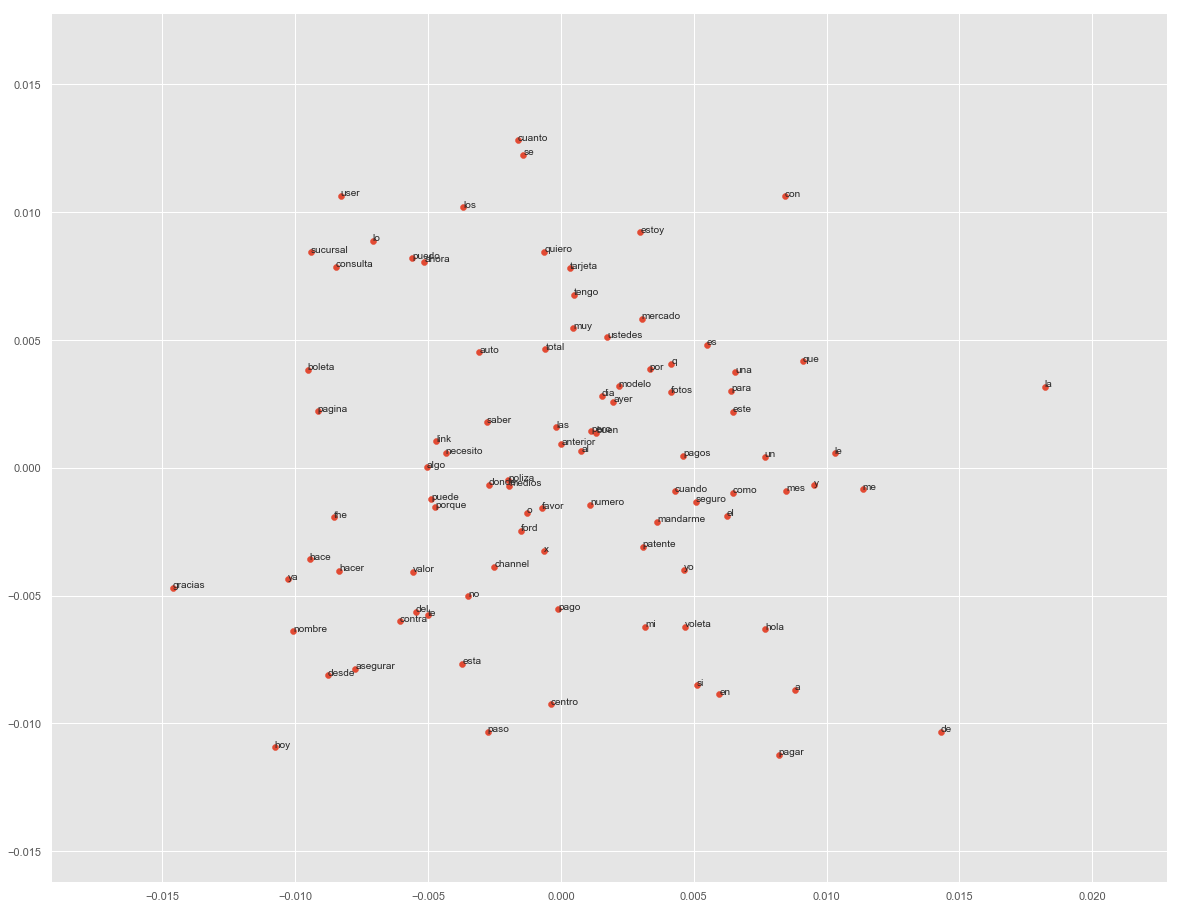

In [14]:
palabras = model[model.wv.vocab]
pca = sk.decomposition.PCA(n_components=2)
result = pca.fit_transform(palabras)

from matplotlib import pyplot
pyplot.figure(figsize=(20,16))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()